# Лабораторная работа №2: Классические методы математической статистики
Выполнил студент гр. 1384 Соломин Данил

## Цель работы
Научится применять методы математической статистики для визуализации и анализа полученных данных; сформировать навыки реализации методов с помощью прикладных программных пакетов.

## Основные теоретические положения

### Алгоритмы, которые использовались для написания кода.


1. **Расчет теоретических частот:** Используя заданный параметры, мы вычисляем теоретические частоты для каждого значения, используя формулу распределения Пуассона.

2. **Применение критерия $ \chi^2 $:** Критерий $ \chi^2 $ рассчитывается по формуле:

    $ \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i} $

   где $ O_i $ — наблюдаемая частота $i$-го значения, $E_i$ — ожидаемая (теоретическая) частота $i$-го значения.

3. **Сравнение с критическим значением:** Рассчитанное значение $ \chi^2 $ сравнивается с критическим значением из таблицы распределения хи-квадрат с соответствующим количеством степеней свободы. Степени свободы обычно равны $ k - 1 - m $, где $ k $ — количество различных значений в выборке, а $ m $ — количество оцениваемых параметров.

4. **Оценка уровня значимости:** Если рассчитанное значение $ \chi^2 $ больше критического, гипотеза о согласии с распределением Пуассона отвергается на уровне значимости $ \alpha_1 $.

5. **p-value** В данном случае мы вычисляем p-value для того, чтобы определить стоит ли отвернуть гипотезу. Это делается при помощи функции $sf = 1 - cdf = 1/(1 - ppf)$


**Оценка гипотезы с использованием теоремы Калмогорова.**

1. **Стандартизация данных**: Преобразуем выборочные данные так, чтобы они имели стандартное нормальное распределение.

2. **Вычисление статистики Колмогорова**: Найдем максимальное абсолютное отклонение между эмпирической функцией распределения выборки и функцией распределения стандартного нормального распределения. $D_n = \sup_x |F_n(x) - F(x; \mu, \sigma)|$

3. **Сравнение со значением критической точки**: Сравним полученную статистику с критической точкой распределения Колмогорова для уровня значимости.

8. **Принятие или отклонение нулевой гипотезы**:
   - Если $ D_n > D_{\alpha} $, то отклонить нулевую гипотезу $ H_0 $, что означает, что данные не подчиняются нормальному распределению.
   - Если $ D_n \leq D_{\alpha} $, то не отклонять нулевую гипотезу.


Выборочное среднее:

$\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i$

Выборочная дисперсия:

$s^2 = \frac{1}{n-1}\sum_{i=1}^{n} (x_i - \bar{x})^2$

Выборочное стандартное отклонение:

$s = \sqrt{s^2}$

Выборочная медиана:
Сортируем выборку по возрастанию и выбираем середину (если $n$ нечетное) или среднее между двумя средними значениями (если $n$ четное).

Выборочный квартиль $q_p$:
Сортируем выборку по возрастанию и выбираем значение, которое делит данные на $p$ и $(1-p)$ доли. Формула для $q_p$ при $n$ элементах в выборке:
$q_p = x_{(k)} + (np - k) \cdot \left(x_{(k+1)} - x_{(k)}\right)$
где $k = \lfloor np \rfloor$.

Выборочный коэффициент асимметрии:
$g_1 = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^3}{s^3}$

Выборочный коэффициент эксцесса:
$g_2 = \frac{\frac{1}{n}\sum_{i=1}^{n}(x_i - \bar{x})^4}{s^4} - 3$


## Постановка задачи
Для полученных в результате эксперимента наборов данных выполнить статистическую обработку. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

### Таблица 1

a. Построить вариционный ряд, эмпирическую функцию распределения и гистограмму частот

Вариационный ряд:  2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 9, 9, 9, 10 





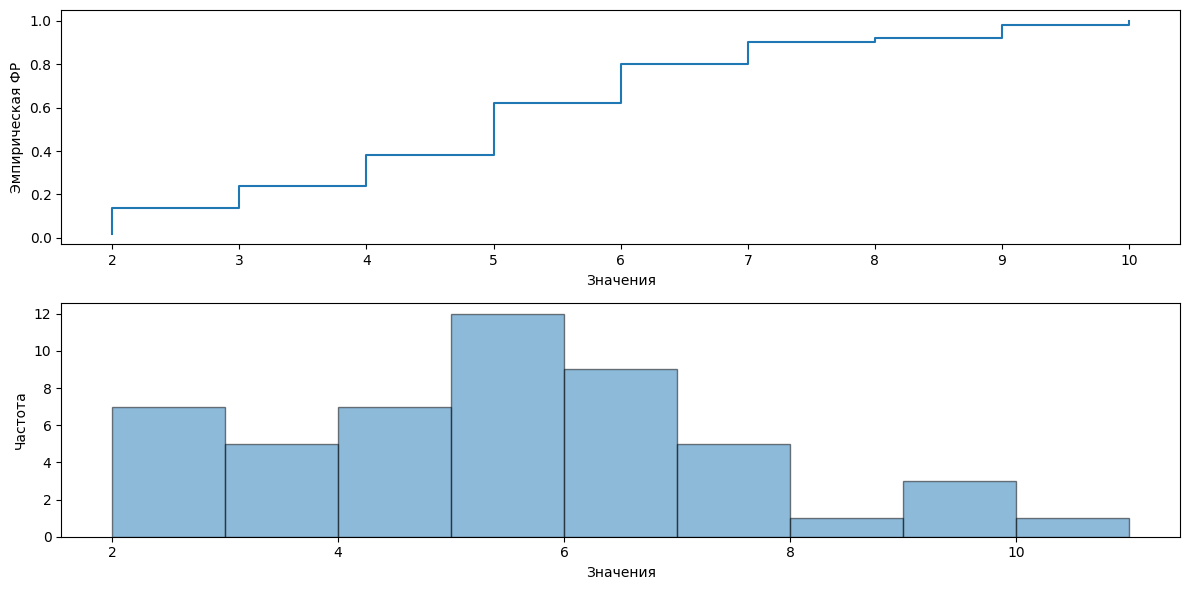

In [979]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

table1 = [4, 7, 2, 2, 5, 6, 9, 2, 4, 4, 3, 3, 7, 4, 2, 7, 5, 5, 5, 5, 5, 2, 5, 6, 6, 6, 4, 6, 8, 4, 5, 7, 7, 2, 4, 3, 6, 6, 2, 5, 5, 5, 9, 10, 3, 9, 5, 3, 6, 6]

sorted = np.sort(table1);
print("Вариационный ряд: ", ", ".join(map(str, sorted)), "\n\n\n")

# Эмпирическая функция распределения
ecdf = np.arange(1, len(sorted) + 1) / len(sorted)

plt.figure(figsize=(12, 6))

# Вариационный ряд и ЭФР
plt.subplot(2, 1, 1)
plt.step(sorted, ecdf, where='post')
plt.xlabel('Значения')
plt.ylabel('Эмпирическая ФР')

# Гистограмма
plt.subplot(2, 1, 2)
plt.hist(table1, bins=range(int(min(table1)), int(max(table1)) + 2), alpha=0.5, edgecolor="black")
plt.xlabel('Значения')
plt.ylabel('Частота')

plt.tight_layout()
plt.show()


b. Вычислить выборочные аналоги следующих числовых характеристик: (i) математического ожидания; (ii) дисперсии;  (iii) СКО; (iv) медианы; (v) асимметрии; (vi) эксцесса (vii) вероятности $\mathrm{P}(X\in \left[ a,b \right])$

In [980]:
var = np.var(table1)
print("Математическое ожидание = ", np.mean(table1))
print("Дисперсия =", var)
print("Стандартное отклонение=", np.sqrt(var))
print("Медиана =", np.median(table1))
print("Асимметрия = ", stats.skew(table1))
print("Эксцесс = ",stats.kurtosis(table1))
print("Вероятность P(X in [3.21, 5.45]) = ", len([x for x in table1 if 3.21 <= x <= 5.45]) / len(table1))

Математическое ожидание =  5.02
Дисперсия = 4.0196
Стандартное отклонение= 2.0048940121612415
Медиана = 5.0
Асимметрия =  0.3597049326915149
Эксцесс =  -0.2706600925442433
Вероятность P(X in [3.21, 5.45]) =  0.38


c. В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить ОМП параметра $\lambda$, а также оценку $\lambda$ по методу моментов. Найти смещение оценок.

**Найдем оценку максимального правдоподобия с помощью ФМП. Запишем распределение пуассона**


$f(k) = \frac{e^{-\lambda} \cdot \lambda^{k}}{k!}$

$\theta = λ$

Запишем ФМП.

$L(\vec{x}, \theta) = \prod_{i=1}^{n} \left( \frac{e^{-\lambda} \cdot \lambda^{x_i}}{x_i!} \right) = \frac{e^{-nλ} \cdot λ^{\sum_{i=1}^{n}x_i}}{\prod_{i=1}^{n} x_i!}$

Находим минимум. Для этого логорифмируем

$LL(\vec{x}, \theta) = -nλ + \sum_{i=1}^{n}x_i ⋅ \ln{λ} - \ln(\prod_{i=1}^{n} x_i!)$

$\frac{\partial LL}{\partial λ} = -n + \frac{\sum_{i=1}^{n}x_i}{λ} = 0$

$\hat{λ} = \frac{\sum_{i=1}^{n}x_i}{n} = \overline{X_в}$

**Оценка максимального правдоподобия по методу моментов**

Заметим, что мат. Ожидание распределения пуассона = $λ$, тогда решением уравнения будет:

$M(X) = \overline{X_в} = \hat{λ}$


**Смещение оценок**

Наши оценки несмещенные, так как:

$M(\hat{λ}) = M(\frac{\sum_{i=1}^{n} x_i}{n}) = \frac{n λ}{n} = \lambda = 5.02$

d. Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$. На базе оценки маскимального правдоподобия.

Имеем

$\frac{\partial LL}{\partial λ} = -n + \frac{\sum_{i=1}^{n}x_i}{λ}$

Тогда

$I_n(λ) = - M(\frac{\partial^2 LL}{\partial \lambda^2}) = -M(-\frac{\sum_{i=1}^{n}x_i}{λ^2}) = \frac{nλ}{λ^2} = \frac{n}{λ}$

$I_1(λ) = \frac{1}{λ}$

$x_{α}: Ф(x_{α}) = 1 - \alpha/2$


тогда

$\lambda \in \left[ \hat{\lambda} - x_{\alpha} \sqrt{\frac{\hat{\lambda} }{n}}; \hat{\lambda} + x_{\alpha} \sqrt{\frac{\hat{\lambda} }{n}} \right] $


Для уровня значимости $α_1 = 0.01$ и объема выборки = 50 получаем



In [981]:
from scipy.stats import norm
import math

# Данные
alpha = 0.01
n = 50
lambda_hat = 5.02

# Находим квантиль x_{α}
z = norm.ppf(1 - alpha / 2)

# Расчет стандартной ошибки
SE = math.sqrt(lambda_hat / n)

# Доверительный интервал
lower_bound = lambda_hat - z * SE
upper_bound = lambda_hat + z * SE

print("Асимптотический доверительный интервал (", (1 - alpha)*100 , "%): [ ", lower_bound, "; ", upper_bound, " ]")


Асимптотический доверительный интервал ( 99.0 %): [  4.20382378205284 ;  5.836176217947159  ]


e. Используя гистограмму частот, построить критерий значимости $𝒳^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 8.00$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.01$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Так как p-value меньше уровня значимости $\alpha_1$, отвергаем нулевую гипотезу о том, что данные подчиняются распределению Пуассона с $λ = 8.0$.

In [982]:
from collections import Counter
from scipy.stats import poisson, chi2


def chi_square_test(values, pmf, lambda_0, free = 1, percent = 0.1):
  # Данные выборки
  n = len(values)

  # Расчет наблюдаемых частот
  observed_frequencies = Counter(values)

  # Расчет ожидаемых частот
  expected_frequencies = {k: n * pmf(k, lambda_0) for k in observed_frequencies}


  # Объединение редких значений
  observed = []
  expected = []
  other_observed = 0
  other_expected = 0
  for k in range(0, max(sorted) + 1):
      obs = observed_frequencies.get(k, 0)
      exp = expected_frequencies.get(k, 0)
      if exp < n * percent: # ожидаем не меньше {percent}% от выборки в это значение
          other_observed += obs
          other_expected += exp
      else:
          observed.append(obs)
          expected.append(exp)

  # Добавляем другие категории
  if other_expected > 0:
      observed.append(other_observed)
      expected.append(other_expected)

  for i in range(len(observed)):
    print("Должно быть ", expected[i],"значений, а из наблюдений ", observed[i])


  # Расчет хи-квадрат статистики
  chi_squared_stat = sum((o - e) ** 2 / e for o, e in zip(observed, expected))

  # Степени свободы
  df = len(observed) - 1 - free

  # Расчет p-значения
  p_value = chi2.sf(chi_squared_stat, df)

  return (chi_squared_stat, df, p_value)

chi_square_test(sorted, poisson.pmf, 8)

Должно быть  6.106910772838602 значений, а из наблюдений  9
Должно быть  6.979326597529832 значений, а из наблюдений  5
Должно быть  6.979326597529832 значений, а из наблюдений  1
Должно быть  6.20384586447096 значений, а из наблюдений  3
Должно быть  14.3739216130019 значений, а из наблюдений  32


(30.32312109636919, 3, 1.1800970783266732e-06)

f. Построить критерий значимости $𝒳^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.01$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Так как p-значение значительно больше уровня значимости, не имеем оснований для отвержения $H_0$ о том, что данные подчиняются распределению Пуассона.

In [983]:
chi_square_test(sorted, poisson.pmf, np.mean(sorted), 1)

Должно быть  6.962602572706607 значений, а из наблюдений  5
Должно быть  8.73806622874679 значений, а из наблюдений  7
Должно быть  8.773018493661782 значений, а из наблюдений  12
Должно быть  7.340092139697016 значений, а из наблюдений  9
Должно быть  5.26389464875415 значений, а из наблюдений  5
Должно быть  10.231285105355163 значений, а из наблюдений  12


(2.7802787698823264, 4, 0.5952417219014883)

g. Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром $λ = 8$ при альтернативе пуассоновости с параметром $λ = 5$. Проверить гипотезу на уровне значимости $a_1$. Что получится если поменять местами основную и альтернативную гипотезы.

Для этого нужно построить критерий. Это делается по методу, который описан в теоретических положениях.

Рассчитанное отношение правдоподобия =  $ 1.23 \times 10^{-14}$.

Это очень маленькое значение, что указывает на то, что данные гораздо более вероятны при альтернативной гипотезе $\lambda = 5$ по сравнению с нулевой гипотезой $\lambda = 8$. Следовательно, необходимо отвергнуть нулевую гипотезу в пользу альтернативной.

Если поменять местами основную и альтернативную гипотезы, то тогда бы, высокое значение отношения правдоподобия указывало бы на большую вероятность данных при нулевой гипотезе, и следовательно, нулевая гипотеза была бы принята.

In [984]:
from scipy.special import factorial

def test_hard_distr(values, lambda_0, lambda_1, pmf=poisson.pmf):

  # Расчет отношения правдоподобия
  L0 = np.prod(pmf(values, lambda_0))
  L1 = np.prod(pmf(values, lambda_1))

  return L0 / L1

print(test_hard_distr(sorted, 8, 5))
print(test_hard_distr(sorted, 5, 8))

1.2301083348212811e-14
81293652899708.8


h. В пунктах (c)-(f) заменить семейство распределений пуассона на семейство геометрических распределений

$P_{λ}(X = k) = \frac{λ^k}{(λ + 1)^{k+1}}$

с2. Построить ОМП м найти смещение

$θ = λ$

$L(\vec{x}, θ) = ∏_{i = 1}^{n}\left(\frac{λ^{x_i}}{(λ + 1)^{x_i+1}}\right) = \frac{λ^{\sum_{i = 1}^{n} x_i}}{(λ + 1)^{n + \sum_{i = 1}^{n} x_i}}$

$LL(\vec{x}, θ) = \ln{λ}\sum_{i = 1}^{n} x_i - (n + \sum_{i = 1}^{n} x_i)\ln{(λ + 1)}$

$\frac{\partial LL}{\partialλ} = \frac{\sum_{i = 1}^{n} x_i}{λ} - \frac{n + \sum_{i = 1}^{n} x_i}{λ + 1} = 0$

$ \frac{\sum_{i = 1}^{n} x_i}{λ} = \frac{n + \sum_{i = 1}^{n} x_i}{λ + 1} $

$ λ \sum_{i = 1}^{n} x_i + \sum_{i = 1}^{n} x_i = λn + λ\sum_{i = 1}^{n} x_i$

$\hat{λ} = \sum_{i = 1}^{n}/n = \overline{X_в} $


**Метод моментов**

Перепишем распределение в следующей форме

$P_{λ}(X = k) = \left(\frac{λ}{1-λ}\right)^k \left(1 - \frac{λ}{1-λ}\right) = \frac{λ^k}{(λ + 1)^{k+1}} $

Тогда мат ожидание

$M(X_i) = \frac{\frac{λ}{1-λ}}{ 1 - \frac{λ}{1-λ} } = λ = \overline{X_в}$

Следовательно оценка параметра еще и не смещена.



d2. Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$. На базе оценки маскимального правдоподобия.

Имеем

$\frac{\partial LL}{\partial λ} = \frac{\sum_{i = 1}^{n} x_i}{λ} - \frac{n + \sum_{i = 1}^{n} x_i}{λ + 1}$

Тогда

$I_n(λ) = - M(\frac{\partial^2 LL}{\partial \lambda^2}) = -M(-\frac{\sum_{i=1}^{n}x_i}{λ^2} + \frac{n + \sum_{i=1}^{n}x_i}{(λ+1)^2} ) =\frac{n}{λ} - \frac{n}{(λ+1)}$

$I_1(λ) = \frac{1}{λ} - \frac{1}{(λ+1)}$

$SE(\hat{λ}) = \sqrt{\frac{1}{I_1(λ)}}$

$x_{α}: Ф(x_{α}) = 1 - \alpha/2$


тогда

$\lambda \in \left[ \hat{\lambda} - x_{\alpha} SE(\hat{λ}); \hat{\lambda} + x_{\alpha} SE(\hat{λ}) \right] $


Для уровня значимости $α_1 = 0.01$ и объема выборки = 50 получаем

In [985]:
from scipy.stats import norm
import math

I_lambda = 1 / lambda_hat - 1 / (lambda_hat + 1)

# Стандартная ошибка оценки
SE = math.sqrt(1 / I_lambda)

lower_bound = lambda_hat - z * SE
upper_bound = lambda_hat + z * SE

print("Асимптотический доверительный интервал (", (1 - alpha)*100 , "%): [ ", lower_bound, "; ", upper_bound, " ]")

Асимптотический доверительный интервал ( 99.0 %): [  -9.140128150603067 ;  19.180128150603068  ]


e2. Используя гистограмму частот, построить критерий значимости $𝒳^2$ проверки простой гипотезы согласия с распределением Пуассона с параметром $\lambda_0 = 8.00$. Проверить гипотезу на уровне значимости $\alpha_1 = 0.01$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Так как p-value меньше уровня значимости $\alpha_1$, отвергаем нулевую гипотезу о том, что данные подчиняются геометрическому распределению с $\lambda = 8$.

In [986]:
from scipy.stats import geom

def geom_pmf(k, lambda_param):
    return geom.pmf(k + 1, 1 / (lambda_param + 1) )

chi_square_test(sorted, geom_pmf, 8, percent=0.06)

Должно быть  4.38957475994513 значений, а из наблюдений  7
Должно быть  3.901844231062337 значений, а из наблюдений  5
Должно быть  3.468305983166522 значений, а из наблюдений  7
Должно быть  3.0829386517035746 значений, а из наблюдений  12
Должно быть  10.97701376218688 значений, а из наблюдений  19


(37.113236861581996, 3, 4.3544103639409845e-08)

f2. Построить критерий значимости $𝒳^2$ проверки сложной гипотезы согласия с распределением Пуассона. Проверить гипотезу на уровне значимости $\alpha_1 = 0.01$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Так как p-value меньше уровня значимости $\alpha_1$, отвергаем нулевую гипотезу о том, что данные подчиняются геометрическому распределению.

In [987]:
chi_square_test(sorted, geom_pmf, 5.2, free=1, percent=0.06)

Должно быть  5.672854217716761 значений, а из наблюдений  7
Должно быть  4.757877730988251 значений, а из наблюдений  5
Должно быть  3.9904780969578884 значений, а из наблюдений  7
Должно быть  3.3468525974485512 значений, а из наблюдений  12
Должно быть  10.180956401858245 значений, а из наблюдений  19


(32.60417661849605, 3, 3.903237668339142e-07)

### Таблица 2

a. Построить вариционный ряд, эмпирическую функцию распределения, гистограмму и полигон частот с шагом h=0.1 для выборки

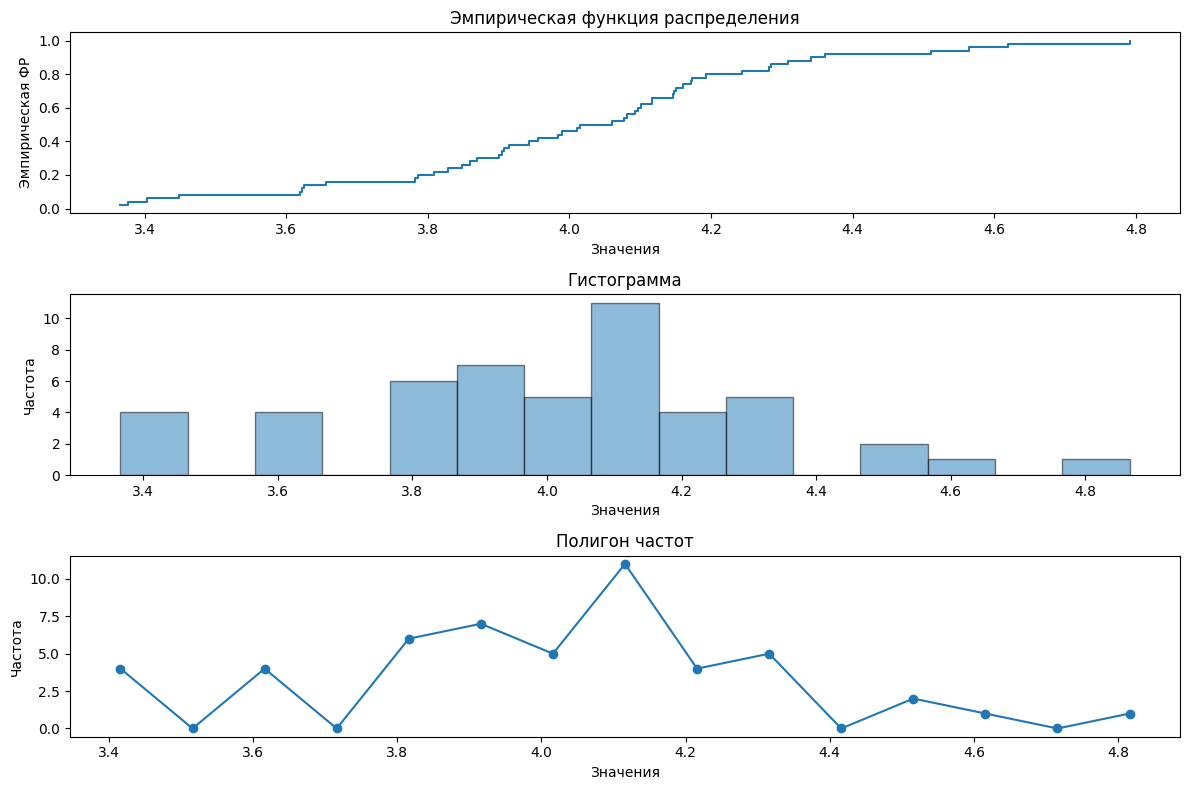

In [988]:
import numpy as np
import matplotlib.pyplot as plt

# Заданная выборка
table2 = np.array([3.984, 3.869, 3.786, 4.173, 4.282, 4.172, 3.9, 4.619, 4.146, 4.193, 3.377, 3.956, 3.809, 4.081, 4.011, 3.905, 4.116, 4.148, 3.848, 4.092, 3.625, 4.15, 4.341, 3.366, 3.782, 3.859, 3.656, 3.989, 3.619, 3.907, 3.829, 4.564, 3.403, 4.51, 4.06, 4.101, 4.097, 4.015, 4.791, 4.077, 3.943, 3.914, 4.16, 4.284, 4.117, 4.361, 3.622, 4.309, 4.244, 3.448])
# table2 = np.random.laplace(4, 0.3, 10000) # Проверки на заранее заготовленных данных
# table2 = np.random.normal(4, 0.3, 10000)
h = 0.1

sorted2 = np.sort(table2)

# Эмпирическая функция распределения
ecdf = np.arange(1, len(sorted2) + 1) / len(sorted2)

# Создание гистограммы и полигона частот
bins = np.arange(min(table2), max(table2) + h, h)
hist, bins = np.histogram(table2, bins=bins)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Начало визуализации
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.step(sorted2, ecdf, where="post")
plt.title("Эмпирическая функция распределения")
plt.xlabel("Значения")
plt.ylabel("Эмпирическая ФР")

plt.subplot(3, 1, 2)
plt.bar(bin_centers, hist, width=h, alpha=0.5, edgecolor="black")
plt.title("Гистограмма")
plt.xlabel("Значения")
plt.ylabel("Частота")

plt.subplot(3, 1, 3)
plt.plot(bin_centers, hist, marker='o')
plt.title("Полигон частот")
plt.xlabel("Значения")
plt.ylabel("Частота")

plt.tight_layout()
plt.show()

b. Вычислить выборочные аналоги следующих числовых характеристик: (i) математического ожидания; (ii) дисперсии;  (iii) СКО; (iv) медианы; (v) асимметрии; (vi) эксцесса (vii) вероятности $\mathrm{P}(X\in \left[ c, d \right])$

In [989]:
var = np.var(table2)
print("Математическое ожидание = ", np.mean(table2))
print("Дисперсия =", var)
print("Стандартное отклонение=", np.sqrt(var))
print("Медиана =", np.median(table2))
print("Асимметрия = ", stats.skew(table2))
print("Эксцесс = ",stats.kurtosis(table2))
print("Вероятность P(X in [3.88, 4.06]) = ", len([x for x in table2 if 3.88 <= x <= 4.06]) / len(table1))

Математическое ожидание =  4.0122
Дисперсия = 0.09318312
Стандартное отклонение= 0.30525910305836906
Медиана = 4.0375
Асимметрия =  -0.025787533579044338
Эксцесс =  0.1835868903722253
Вероятность P(X in [3.88, 4.06]) =  0.22


c. В предположении, что исходные наблюдения являются выборкой из нормального распределения, построить оценку максимального правдоподобия параметров $(α,\sigma^2)$ и соответствующие оценки по методу моментов. Найти смещение оценок.

Запишем оценку максимального правдоподобия для нормального распределения

$P_{θ}(x) = \frac{1}{\sqrt{2\pi}\sigma} exp\left( -\frac{1}{2}\frac{(x-a)^2}{\sigma^2}\right)$

**Ф. Правдоподобия**

$L(\vec{x}; θ) = ∏_{i=1}^{n} \left( \frac{1}{\sqrt{2\pi}\sigma} exp\left( -\frac{1}{2}\frac{(x_i-a)^2}{\sigma^2}\right) \right) $

$LL(\vec{x}, θ) = - \frac{n}{2}\ln(2\pi) - n\ln(\sigma) - \frac{1}{2\sigma^2}\sum_{i=1}^n (x_i - a)^2$

**Находим оценку для параметра a**

$\frac{\partial LL}{∂a} = \sum_{i=1}^n (x_i) - na = 0$

$\hat{a} = \overline{x} $

**По аналогии находим оценку для $\sigma$**


$\frac{\partial LL}{∂\sigma} = -\frac{n}{\sigma} + \frac{1}{\sigma^3}\sum_{i=1}^n (x_i - a)^2 = 0$

$\hat{\sigma^2} = s^2$

**Найдет смещение оценов**

$\hat{a}$:

$M(\hat{a}) = \frac{1}{n} \sum_{i=1}^n M(X_i) = \frac{n}{n} a = a $ (Оценка не смещена)


$\hat{\sigma^2} = s^2$:

$M\left(\hat{\sigma^2}\right) = M\left(\frac{1}{n} \sum_{i=1}^n (X_i - \overline{X})^2\right) = M\left(\frac{1}{n} \sum_{i=1}^n X_i^2 - \left(\frac{1}{n} \sum_{i=1}^n X_i \right)^2 \right) =  \frac{1}{n} M\left( \sum_{i=1}^n X_i^2 \right) - \frac{1}{n^2} M\left( \sum_{i=1}^n X_i\right)^2 = \frac{1}{n}\cdot M(X_1^2 + X_2^2 + ... + X_n^2) - \frac{1}{n^2}M\left(X_1 + X_2 + ... + X_n \right)^2 = \frac{1}{n}\cdot (MX_1^2 + MX_2^2 + ... + MX_n^2) - \frac{1}{n^2} M\left(X_1^2 + X_2^2 +...+X_n^2 + 2(X_1X_2 + X_1X_3 ... + X_{n_1}X_{n})\right) = $

$ = \frac{n-1}{n^2} (MX_1^2 + MX_2^2 + ... + MX_n^2) - \frac{2}{n^2}(MX_1 \cdot MX_2 + MX_1 \cdot MX_3 + ... + MX_{n-1} \cdot MX_{n}) = \frac{n-1}{n}(MX^2  \cdot n) - \frac{2}{n^2}\left((MX)^2 \cdot \frac{n(n-1)}{2}\right) = \frac{n-1}{n}MX^2 - \frac{n-1}{n}(MX)^2 = \frac{n-1}{n}(MX^2 - (MX)^2) = \frac{n-1}{n}DX $

Тогда исправленая оцена $\hat{\sigma^2}$:

$\widetilde{\sigma^2} = \frac{n}{n-1}s^2$


d. Построить доверительные интервалы уровня значимости $α_2$ для параметров $(a, σ^2)$


Построим доверительный интервал. Для параметра $\theta_1 = a$

Если записать коротко, то получаем следующее

$\sqrt{n}\frac{\overline{X} - a}{\sigma} \sim N(0, 1)$

$\frac{ns^2}{\sigma^2} \sim χ_{n-1}^2$

Переходим к распределению Стьюдента

$\frac{\sqrt{n}(\overline{X} - a)⋅\sqrt{n-1} \cdot \sigma}{\sqrt{ns^2} \cdot \sigma} \sim S_{n-1}$

$\frac{(\overline{X} - a)⋅\sqrt{n-1}}{s} \sim S_{n-1}$

$P_0 \left( S_{n-1} \in [-x_α; x_α] \right) = 1 - α$

$x_\alpha$: $S(x_α) = 1 - \alpha/2$

$P_0 \left( -x_{α} ≤ \frac{(\overline{X} - a)⋅\sqrt{n-1}}{s} ≤ x_{α} \right)$

$P_0 \left( \overline{X}-\frac{x_{α}s}{\sqrt{n-1}} ≤ a ≤ \overline{X} + \frac{x_{α}s}{\sqrt{n-1}}  \right)$

$a \in [ \overline{X}-\frac{x_{α}s}{\sqrt{n-1}};  \overline{X}+\frac{x_{α}s}{\sqrt{n-1}}] $

Построим доверительный интервал. Для параметра $\theta_2 = \sigma^2$

Понимаем, что из распределения $χ^2$

$\frac{ns^2}{σ^2} \sim \chi^2_{n-1}$

Тогда

$P_0 \left( \chi^2_{n-1} \in [x_{1α}; x_{2α}] \right) = 1 - α$

$x_{1\alpha}$: $S(x_{1α}) = 1 - \alpha/2$

$x_{2\alpha}$: $S(x_{2α}) = \alpha/2$

$P_0 \left( x_{1α} ≤ \frac{ns^2}{σ^2} ≤ x_{2α} \right)$


$P_0 \left( \frac{ns^2}{x_{1α}} ≤ σ^2 ≤ \frac{ns^2}{x_{2α}} \right)$

$\sigma^2 \in \left[\frac{ns^2}{x_{1α}}; \frac{ns^2}{x_{2α}}\right]$

In [990]:
from scipy.stats import nct, chi2

mean = np.mean(table2)
n_2 = len(table2)
std = np.std(table2)

alpha_2 = 0.02

# Оценка a
tollerance = nct.ppf(1 - alpha_2 / 2, n_2 - 1, 0)*std/(np.sqrt(n_2 - 1))

level_x_1a = chi2.ppf(1 - alpha_2 / 2, n_2 - 1)
level_x_2a = chi2.ppf(alpha_2 / 2, n_2 - 1)

# оценка sigma^2
a_estimate =  mean - tollerance, mean + tollerance
s_estimate = (n_2)*std**2/level_x_1a, (n_2)*std**2/level_x_2a

a_estimate, s_estimate


((3.907326414075867, 4.117073585924133),
 (0.06218885066940135, 0.16099004853883753))

e. С использованием теоремы Колмогорова построить критерий значимости простой гипотезы согласия с нормальным распределением с параметрами $(\alpha_0, \sigma_0^2 )$ Проверить гипотезу на уровне значимости $α_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Имеем $a_0 = 4, \sigma_0 = 0.30$

Для того, чтобы проверить простую гипотезу с использованием теоремы Колмогорова используем выкладки из теоретических положений (см Теоретические положения для подробного описания алгоритма), и напишем необходимый код.

Видим, что p-value довольно большое, что позовляет судить о том, что у нас нет оснований отвергунть гипотезу о том, что наши данные принадлежат нормальному распределению с параметрами $(4, 0.3^2)$

In [991]:
from scipy.stats import norm, kstest

# Заданные параметры нормального распределения
mu_0 = 4
s_0 = 0.3

# Стандартизация данных
standardized_data = [(x - mu_0) / s_0 for x in table2]

# Применение критерия Колмогорова-Смирнова
kstest(standardized_data, 'norm')


KstestResult(statistic=0.0812819470942523, pvalue=0.8692147638253225, statistic_location=0.25666666666666654, statistic_sign=-1)

f. Используя гистограмму частот, построить критерий значимости $𝒳^2$ проверки простой гипотезы согласия с нормальным распределением с параметрами $(α_0,\sigma_0^2)$. Проверить гипотезу на уровне значимости $α_2$. Вычислить наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

По аналогии с Таблицей 1 необходимо вычислить **теоретические** вероятности для нормального распределения и сравнить их с исходными. То, что теперь оцениваем 2 параметра повлияет на степени свободы распределения $\chi^2$

Значение p-value позволяет сделать аналогичный вывод о том, что у нас нет оснований отвергунть гипотезу о том, что наши данные принадлежат нормальному распределению с параметрами $(4, 0.3^2)$

In [992]:
def chi_square_test_2(values, mu, sigma, cdf = norm.cdf):
    # Вычисляем теоретические частоты
    n = len(values)
    bins = np.sqrt(n).astype(int)  # количество интервалов
    observed, bin_edges = np.histogram(values, bins=bins)
    expected = n * (cdf(bin_edges[1:], mu, sigma) - cdf(bin_edges[:-1], mu, sigma))

    # Вычисляем значение критерия Хи-квадрат
    chi_square_stat = sum((o - e) ** 2 / e for o, e in zip(observed, expected))
    p_value = chi2.sf(chi_square_stat, bins - 1 - 2) # оцениваем 2 параметра, так что - 2


    return chi_square_stat, p_value


chi_square_test_2(table2, mu_0, s_0)

(6.135209482882143, 0.18927573138773524)

g. Построить критерий проверки значимости $𝒳^2$ сложной гипотезы согласия с нормальным распределением. Проверить гипотезу на уровне значимости $α_2$. Вычислить наибольщее значение ровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Значение p-value позволяет сделать аналогичный вывод о том, что у нас нет оснований отвергунть гипотезу о том, что наши данные принадлежат нормальному распределению.

In [993]:
chi_square_test_2(table2, np.mean(table2), n_2/(n_2 - 1) * np.std(table2)) # берем несмещенную оценку

(6.271244094398722, 0.17978667039862037)

h. Построить наиболее мощный критерий проверки простой гипотезы о нормальности с параметром $(a_0, σ^2_0) = (a_0, σ^2_0)$ при альтернативе нормальности с параметром $(a_0, σ^2_0) = (a_1, σ^2_1)$. Проверить гипотезу на уровне значимости $α_2$. Что получится, если поменять местами основную и альтернативную гипотезы?


Для этого нужно построить критерий. Это делается по методу, который описан в теоретических положениях.

Рассчитанное отношение правдоподобия =  $ 1.06 \times 10^{-10}$.

Это очень маленькое значение, что указывает на то, что данные гораздо более вероятны при альтернативной гипотезе $\alpha_0 = 4, \sigma = 0.3$ по сравнению с нулевой гипотезой $\alpha_0 = 4.3, \sigma = 0.3$. Следовательно, необходимо отвергнуть нулевую гипотезу в пользу альтернативной.

Если поменять местами основную и альтернативную гипотезы, то тогда бы, высокое значение отношения правдоподобия указывало бы на большую вероятность данных при нулевой гипотезе, и следовательно, нулевая гипотеза была бы принята.

In [994]:

from scipy.stats import norm
def likelihood_test_2(mu0, s0, mu1, s1, fn=norm.pdf):
  L0 = np.prod(norm.pdf(sorted2, mu0, s0))
  L1 = np.prod(norm.pdf(sorted2, mu1, s1))


  return L0 / L1

mu_1 = 4.3
s_1 = 0.3

print(likelihood_test_2(mu_0, s_0, mu_1, s_1))
print(likelihood_test_2( mu_1, s_1, mu_0, s_0))

9425330789.244263
1.0609707206681301e-10


i. В пунктах (c)-(g) заменить семейство нормальных распределений на двухпараметрическое семейство распределений Лапласа с плотностями

$p_{α,σ}(x) = \frac{1}{\sqrt{2}σ} exp\left(-\frac{\sqrt{2}}{σ}\left|x - a\right|\right)$

i.c В предположении, что исходные наблюдения являются выборкой из нормального распределения, построить оценку максимального правдоподобия параметров $(α,\sigma^2)$ и соответствующие оценки по методу моментов. Найти смещение оценок.

**Построим оценку максимального правдоподобия по параметру $α$**

$p_{α,σ}(x) = \frac{1}{\sqrt{2}σ} exp\left(-\frac{\sqrt{2}}{σ}\left|x - a\right|\right)$

$L(\vec{x}, \theta) = \prod_{i=1}^n \frac{1}{\sqrt{2}σ} exp\left(-\frac{\sqrt{2}}{σ}\left|x_i - a\right|\right) =  \frac{1}{(\sqrt{2}σ)^n} exp\left(-\frac{\sqrt{2}}{σ} \sum_{i=1}^n \left|x_i - a\right|\right)$

$LL(\vec{x}, \theta) = -n\ln{(\sqrt{2} \sigma)} - \frac{\sqrt{2}}{σ} \sum_{i=1}^n \left|x_i - a\right|$


$\frac{∂LL}{∂a} = - \frac{\sqrt{2}}{\sigma} \sum_{i=1}^n {\frac{x_i - a}{|x_i - a|}} = 0$

$\frac{\sum^n_{i = 1}{x_i}}{n} = \hat{a}$

$\hat{a} = \overline{X}$

**Построим оценку максимального правдоподобия по параметру $\sigma^2$**

$LL(\vec{x}, \theta) = -n\ln{(\sqrt{2} \sigma)} - \frac{\sqrt{2}}{σ} \sum_{i=1}^n \left|x_i - a\right|$


$\frac{∂LL}{∂\sigma} = -\frac{n}{\sigma} + \frac{\sqrt{2}}{\sigma^2} \sum_{i=1}^n \left|x_i - a\right| = 0$

$n = \frac{\sqrt{2}}{\sigma} \sum_{i=1}^n \left|x_i - a\right|$

$\sigma = \frac{\sqrt{2}}{n} \sum_{i=1}^n \left|x_i - a\right|$

$\hat{\sigma^2} = \frac{2}{n^2} \left(\sum_{i=1}^n \left|x_i - \overline{X}\right|\right)^2$

**Находим отклонение оценок**

$α:$

$M(\overline{X}) = \frac{n}{n}a = a$

$σ:$

Если раскрыть скобки, то все что без квадрата, то = 0, а то, что с квадратом, то дисперсия $×$ n.

$M\left(\frac{2}{n^2} \left(\sum_{i=1}^n \left|x_i - \overline{X}\right|\right)^2\right) = \frac{2}{n^2} M\left(\sum_{i=1}^n \left|x_i - \overline{X}\right|\right)^2 = \frac{2}{n^2} n^2 \sigma^2 = 2\sigma^2$

Наша оценка смещена в 2. Тогда несмещенная оценка

$\widetilde{σ^2} = \frac{1}{n^2} \left(\sum_{i=1}^n \left|x_i - \overline{X}\right|\right)^2$

i.d Построить доверительные интервалы уровня значимости $α_2$ для параметров $(α, σ^2)$

d2. Построить асимптотический доверительный интервал уровня значимости $\alpha_1$ для параметра $\lambda$. На базе оценки маскимального правдоподобия.

Имеем

$\frac{∂LL}{∂\sigma} = -\frac{n}{\sigma} + \frac{\sqrt{2}}{\sigma^2} \sum_{i=1}^n \left|x_i - \overline{X}\right| = 0$


$\frac{∂^2LL}{∂\sigma^2} = \frac{n}{\sigma^2} - \frac{2\sqrt{2}}{\sigma^3} \sum_{i=1}^n \left|x_i - \overline{X}\right|$


Тогда

$I_n(λ) = -M\left( \frac{n}{\sigma^2} - \frac{2\sqrt{2}}{\sigma^3} \sum_{i=1}^n \left|x_i - \overline{X}\right| \right) = \frac{n}{\sigma^2}$

$I_1(λ) = \frac{1}{σ^2}$

$SE(\hat{λ}) = \sqrt{\frac{1}{I_1(λ)}}$

$x_{α}: Ф(x_{α}) = 1 - \alpha/2$


тогда

$\lambda \in \left[ \hat{\lambda} - x_{\alpha} SE(\hat{λ}); \hat{\lambda} + x_{\alpha} SE(\hat{λ}) \right] $


Для уровня значимости $α_2 = 0.02$ и объема выборки = 50 получаем

In [995]:
sigma2_hat = np.var(table2)

I_lambda = 1 / sigma2_hat

# Стандартная ошибка оценки
SE = math.sqrt(1 / sigma2_hat)

# Находим квантиль x_{α}
z = norm.ppf(1 - alpha_2 / 2)

lower_bound = sigma2_hat - z * SE
upper_bound = sigma2_hat + z * SE

print("Асимптотический доверительный интервал (", (1 - alpha_2)*100 , "%): [ ", lower_bound, "; ", upper_bound, " ]")

Асимптотический доверительный интервал ( 98.0 %): [  -7.527712868795513 ;  7.714079108795513  ]


i.e С использованием теоремы Колмогорова построить критерий значимости простой гипотезы согласия с нормальным распределением с параметрами $(\alpha_0, \sigma_0^2 )$ Проверить гипотезу на уровне значимости $α_2$. Вычислить наибольшее знчение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Так как pvalue > уровня значимости, то у нас нет оснований отвергнуть нулевую гипотезу

In [996]:
from scipy.stats import laplace

# Стандартизация данных
standardized_data = [(x - mu_0) / s_0 for x in table2]
# Применение критерия Колмогорова-Смирнова
kstest(standardized_data, 'laplace')

KstestResult(statistic=0.09318697693014366, pvalue=0.742936304005941, statistic_location=0.25666666666666654, statistic_sign=-1)

i.f Используя гистограмму частот, построить критерий значимости $𝒳^2$ проверки простой гипотезы согласия с нормальным распределением с параметрами $(α_0,\sigma_0^2)$. Проверить гипотезу на уровне значимости $α_2$. Вычислить наибольшее значинеие уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Так как pvalue > уровня значимости, то у нас нет оснований отвергнуть нулевую гипотезу

In [997]:
chi_square_test_2(table2, mu_0, s_0, cdf=laplace.cdf)

(3.58481296637628, 0.4651000569289523)

i.g Построить критерий проверки значимости $𝒳^2$ сложной гипотезы согласия с нормальным распределением. Проверить гипотезу на уровне значимости $α_2$. Вычислить наибольщее значение ровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.

Так как pvalue > уровня значимости, то у нас нет оснований отвергнуть нулевую гипотезу

из-зв малого количества данных и "похожести" распределений, мы не можем точно сказать из какого именно распределения предоставленные данные. На более больших объемах результаты будут более однозначны.

In [998]:
chi_square_test_2(table2, np.mean(table2), np.std(table2), cdf=laplace.cdf)

(3.693003941915029, 0.4491442788412342)

## Выводы

В рамках проведенного исследования были выполнены следующие аналитические задачи:

1. **Оценка Максимального Правдоподобия:**
2. **Асимптотический Доверительный Интервал:**
3. **Критерий Хи-Квадрат для Гипотезы Согласия:**
4. **Критерий Отношения Правдоподобия:**
5. **Работа с непрерывными распределениями**

Исследование позволило глубже понять природу и свойства распределения Пуассона и геометрического распределения, а также научиться применять статистические методы для анализа данных. Было исследовано нормальное распределение и распределение Лапласа. Это позволило получить опыт работы с непрерывными распределениями.  Особое внимание было уделено гипотезам, что является очень важной частью статистического анализа.